<a href="https://colab.research.google.com/github/XM2202-02/hello-github-actions/blob/main/T12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

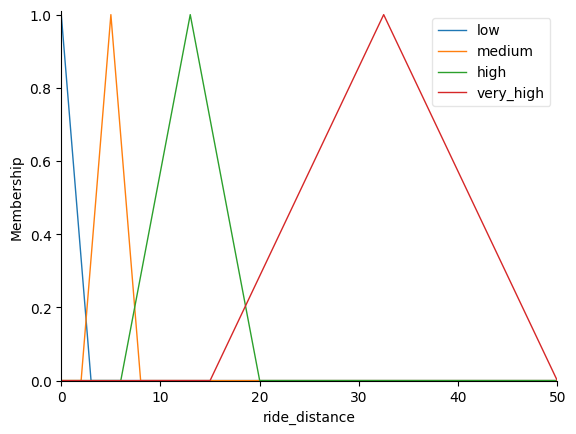

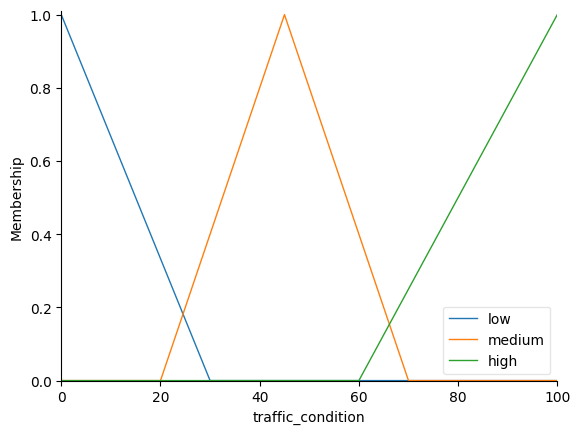

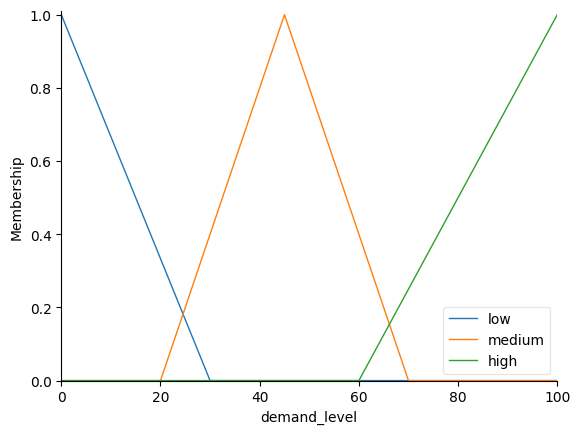

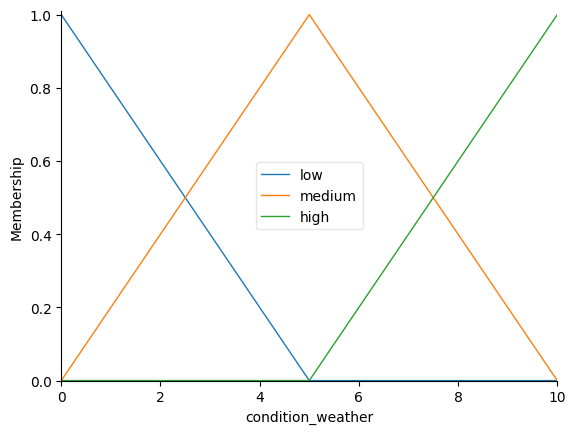

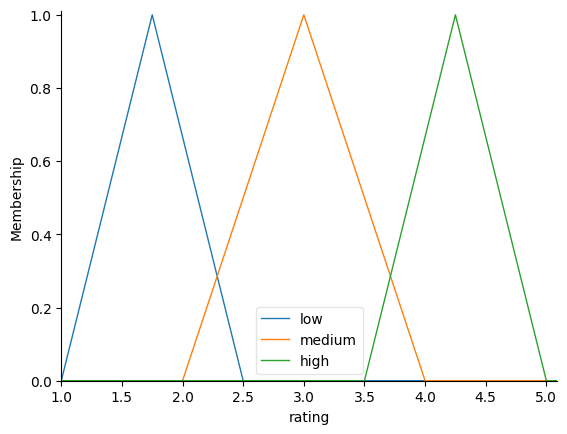

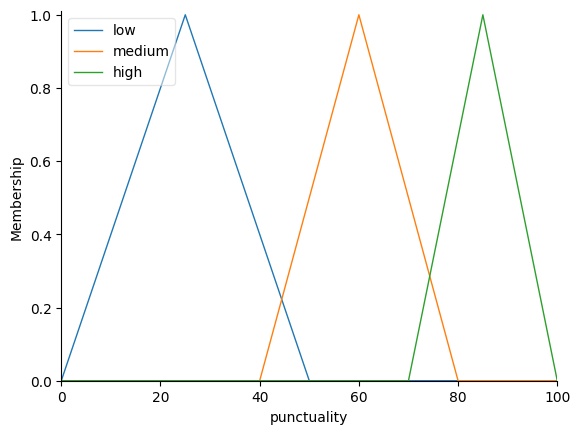

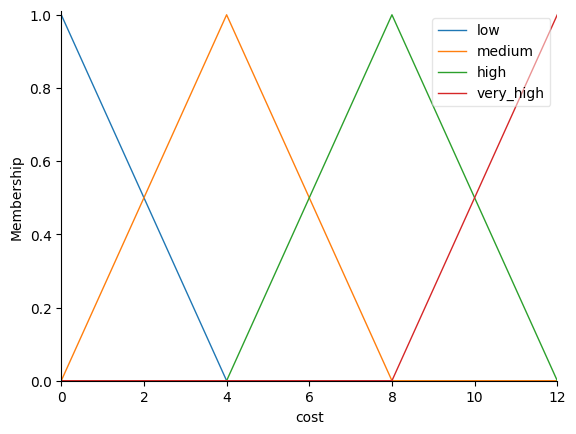

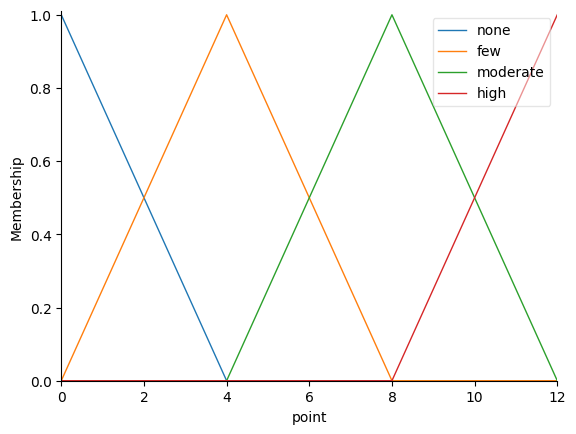

In [ ]:
#T12 Grab
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
ride_distance=ctrl.Antecedent(np.arange(0,50.1,0.1),'ride_distance')
traffic_condition=ctrl.Antecedent(np.arange(0,100.1,0.1),'traffic_condition')
demand_level=ctrl.Antecedent(np.arange(0,100.1,0.1),'demand_level')
condition_weather=ctrl.Antecedent(np.arange(0,10.1,0.1),'condition_weather')
rating=ctrl.Antecedent(np.arange(1,5.1,0.01),'rating')
punctuality=ctrl.Antecedent(np.arange(0,100.1,0.1),'punctuality')
cost=ctrl.Consequent(np.arange(0,12.1,0.1),'cost')
point=ctrl.Consequent(np.arange(0,12.1,0.1),'point')
ride_distance['low']=fuzz.trimf(ride_distance.universe,[0,0,3])
ride_distance['medium']=fuzz.trimf(ride_distance.universe,[2,5,8])
ride_distance['high']=fuzz.trimf(ride_distance.universe,[6,13,20])
ride_distance['very_high']=fuzz.trimf(ride_distance.universe,[15,32.5,50])
traffic_condition['low']=fuzz.trimf(traffic_condition.universe,[0,0,30])
traffic_condition['medium']=fuzz.trimf(traffic_condition.universe,[20,45,70])
traffic_condition['high']=fuzz.trimf(traffic_condition.universe,[60,100,100])
demand_level['low']=fuzz.trimf(demand_level.universe,[0,0,30])
demand_level['medium']=fuzz.trimf(demand_level.universe,[20,45,70])
demand_level['high']=fuzz.trimf(demand_level.universe,[60,100,100])
condition_weather['low']=fuzz.trimf(condition_weather.universe,[0,0,5])
condition_weather['medium']=fuzz.trimf(condition_weather.universe,[0,5,10])
condition_weather['high']=fuzz.trimf(condition_weather.universe,[5,10,10])
rating['low']=fuzz.trimf(rating.universe,[1,1.75,2.5])
rating['medium']=fuzz.trimf(rating.universe,[2,3,4])
rating['high']=fuzz.trimf(rating.universe,[3.5,4.25,5])
punctuality['low']=fuzz.trimf(punctuality.universe,[0,25,50])
punctuality['medium']=fuzz.trimf(punctuality.universe,[40,60,80])
punctuality['high']=fuzz.trimf(punctuality.universe,[70,85,100])
cost['low']=fuzz.trimf(cost.universe,[0,0,4])
cost['medium']=fuzz.trimf(cost.universe,[0,4,8])
cost['high']=fuzz.trimf(cost.universe,[4,8,12])
cost['very_high']=fuzz.trimf(cost.universe,[8,12,12])
point['none']=fuzz.trimf(point.universe,[0,0,4])
point['few']=fuzz.trimf(point.universe,[0,4,8])
point['moderate']=fuzz.trimf(point.universe,[4,8,12])
point['high']=fuzz.trimf(point.universe,[8,12,12])
ride_distance.view()
traffic_condition.view()
demand_level.view()
condition_weather.view()
rating.view()
punctuality.view()
cost.view()
point.view()

Cost: 4.000000000000001
The 'point' output was not calculated. Check your rules and input values.


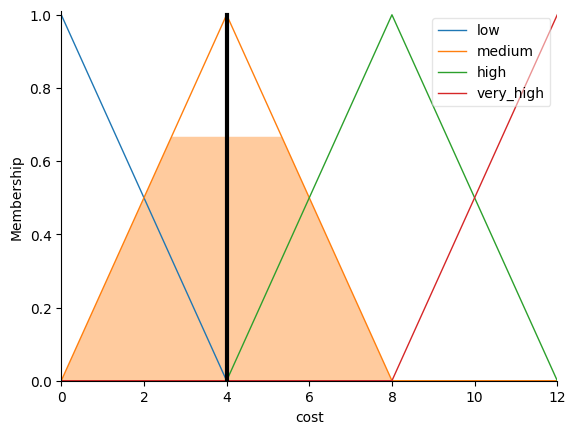

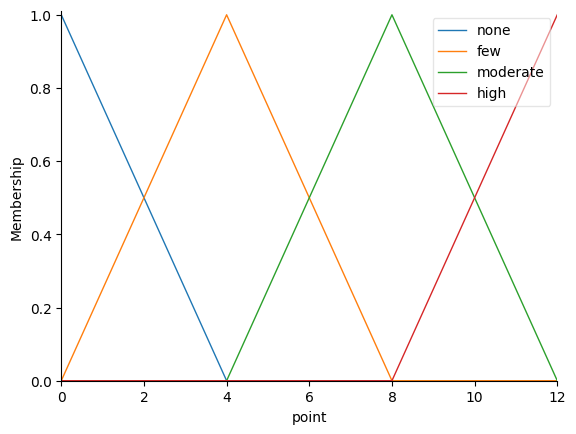

In [ ]:
rule1=ctrl.Rule(ride_distance['low'] & traffic_condition['low'] & demand_level['low'], cost['low'])
rule2=ctrl.Rule(ride_distance['low'] & traffic_condition['medium'] & demand_level['high'], cost['medium'])
rule3=ctrl.Rule(ride_distance['medium'] & traffic_condition['high'] & demand_level['high'], cost['high'])
rule4=ctrl.Rule(ride_distance['high'] & traffic_condition['medium'] & condition_weather['high'], cost['medium'])
rule5=ctrl.Rule(ride_distance['high'] & traffic_condition['high'] & condition_weather['low'],cost['very_high'])
rule6=ctrl.Rule(ride_distance['very_high'] & traffic_condition['high'] & demand_level['high'],cost['very_high'])
rule7=ctrl.Rule(ride_distance['medium'] & traffic_condition['low'] & demand_level['low'], cost['medium'])
rule8=ctrl.Rule(ride_distance['low'] & traffic_condition['high'] & condition_weather['low'], cost['high'])
rule9=ctrl.Rule(ride_distance['very_high'] & condition_weather['low'], cost['very_high'])
rule10=ctrl.Rule(ride_distance['medium'] & traffic_condition['medium'] & condition_weather['medium'], cost['medium'])
rule11=ctrl.Rule(rating['low'] & punctuality['low'], point['none'])
rule12=ctrl.Rule(rating['medium'] & punctuality['medium'], point['moderate'])
rule13=ctrl.Rule(rating['high'] & punctuality['high'], point['high'])
rule14=ctrl.Rule(ride_distance['high']& traffic_condition['high']&punctuality['medium'],point['high'])
rule15=ctrl.Rule(ride_distance['medium']& traffic_condition['medium']&rating['medium'],point['moderate'])
rule16=ctrl.Rule(rating['low']&punctuality['low'],point['none'])
rule17=ctrl.Rule(ride_distance['very_high']&condition_weather['low']&rating['high'],point['high'])
rule19=ctrl.Rule(ride_distance['medium']&condition_weather['medium']&rating['high'],point['moderate'])
rule18=ctrl.Rule(ride_distance['low']&rating['medium']&punctuality['medium'],point['few'])
rule20=ctrl.Rule(ride_distance['high']&traffic_condition['high']&punctuality['low'],point['few'])
pricing_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20])
ctrl_sim = ctrl.ControlSystemSimulation(pricing_ctrl)
ctrl_sim.input['ride_distance'] = 5
ctrl_sim.input['traffic_condition'] = 10
ctrl_sim.input['condition_weather'] = 10
ctrl_sim.input['rating'] = 0
ctrl_sim.input['punctuality'] = 0
ctrl_sim.input['demand_level'] = 0

ctrl_sim.compute()
if 'cost' in ctrl_sim.output:
    print(f"Cost: {ctrl_sim.output['cost']}")
else:
    print("The 'cost' output was not calculated. Check your rules and input values.")
if 'point' in ctrl_sim.output:
    print(f"Point: {ctrl_sim.output['point']}")
else:
    print("The 'point' output was not calculated. Check your rules and input values.")
cost.view(sim=ctrl_sim)
point.view(sim=ctrl_sim)
